<a href="https://colab.research.google.com/github/awagler2/PUBH5357/blob/main/multicollinearity_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:



dat=read.csv("diabetes[1].csv")
str(dat)

Warning message in file(file, "rt"):
“cannot open file 'diabetes[1].csv': No such file or directory”


ERROR: Error in file(file, "rt"): cannot open the connection


In [2]:
dat2=read.csv("real_cervical.csv")[,-c(1,2,15:31)]
str(dat2)

'data.frame':	858 obs. of  19 variables:
 $ Age                            : int  18 15 34 52 46 42 51 26 45 44 ...
 $ Number.of.sexual.partners      : num  4 1 1 5 3 3 3 1 1 3 ...
 $ First.sexual.intercourse       : num  15 14 17 16 21 23 17 26 20 15 ...
 $ Num.of.pregnancies             : num  1 1 1 4 4 2 6 3 5 2 ...
 $ Smokes                         : num  0 0 0 1 0 0 1 0 0 1 ...
 $ Smokes..years.                 : num  0 0 0 37 0 ...
 $ Smokes..packs.year.            : num  0 0 0 37 0 0 3.4 0 0 2.8 ...
 $ Hormonal.Contraceptives        : num  0 0 0 1 1 0 0 1 0 0 ...
 $ Hormonal.Contraceptives..years.: num  0 0 0 3 15 0 0 2 0 0 ...
 $ IUD                            : num  0 0 0 0 0 0 1 1 0 0 ...
 $ IUD..years.                    : num  0 0 0 0 0 0 7 7 0 0 ...
 $ STDs                           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Dx.CIN                         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dx.HPV                         : int  0 0 0 1 0 0 0 0 1 0 ...
 $ Dx                           

In [4]:
# Install and load necessary libraries (if not already installed)
if(!require(corrplot)) install.packages("corrplot")
library(corrplot)

# Calculate the correlation matrix
cor_matrix <- cor(dat)

# Create the correlation heatmap
corrplot(cor_matrix, method = "color",
         type = "upper", order = "hclust",
         addCoef.col = "grey", # Add correlation coefficients
         tl.col = "black", tl.srt = 45, # Text label color and rotation
         diag = FALSE) # Remove diagonal part

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



ERROR: Error: object 'dat' not found


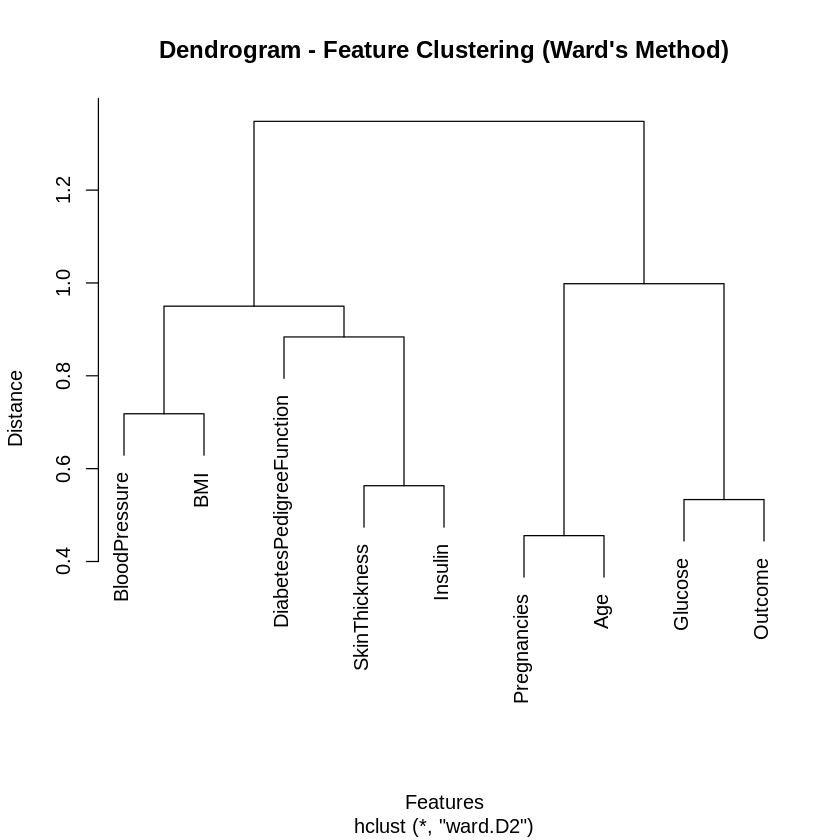

In [ ]:
if(!require(cluster)) install.packages("cluster")
library(cluster)

# Calculate distance matrix for features (using correlation-based distance)
distance_matrix <- as.dist(1 - cor(dat))

# Perform hierarchical clustering using Ward's method
hc_model <- hclust(distance_matrix, method = "ward.D2")

# Plot the dendrogram
plot(hc_model, main = "Dendrogram - Feature Clustering (Ward's Method)",
     xlab = "Features", ylab = "Distance")

In [6]:
# Calculate the correlation matrix
cor_matrix2 <- cor(dat2)

# Create the correlation heatmap
pdf("correlation_plot.pdf")
par(cex=0.6)
corrplot(cor_matrix2, method = "color",
         type = "upper", order = "hclust",
         tl.col = "black", tl.srt = 45, # Text label color and rotation
         diag = FALSE) # Remove diagonal part
dev.off()

pdf 
  2

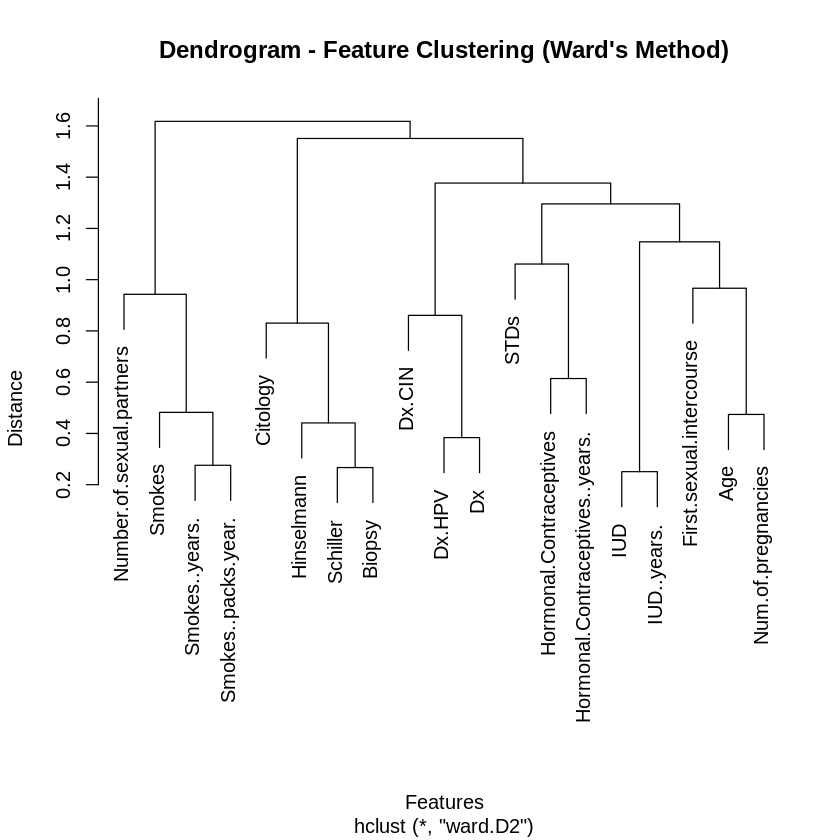

In [ ]:
# Calculate distance matrix for features (using correlation-based distance)
distance_matrix <- as.dist(1 - cor(dat2))

# Perform hierarchical clustering using Ward's method
hc_model <- hclust(distance_matrix, method = "ward.D2")

# Plot the dendrogram
plot(hc_model, main = "Dendrogram - Feature Clustering (Ward's Method)",
     xlab = "Features", ylab = "Distance")

In [ ]:
# Install and load the 'car' package if you haven't already
if(!require(car)) install.packages("car")
library(car)

mod=glm(Outcome~.,data=dat,family="binomial")
summary(mod)

# Assuming 'mod' is your glm model
vif_values <- vif(mod)

# Print the VIF values
print(vif_values)

Loading required package: car

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘car’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData




Call:
glm(formula = Outcome ~ ., family = "binomial", data = dat)

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.4046964  0.7166359 -11.728  < 2e-16 ***
Pregnancies               0.1231823  0.0320776   3.840 0.000123 ***
Glucose                   0.0351637  0.0037087   9.481  < 2e-16 ***
BloodPressure            -0.0132955  0.0052336  -2.540 0.011072 *  
SkinThickness             0.0006190  0.0068994   0.090 0.928515    
Insulin                  -0.0011917  0.0009012  -1.322 0.186065    
BMI                       0.0897010  0.0150876   5.945 2.76e-09 ***
DiabetesPedigreeFunction  0.9451797  0.2991475   3.160 0.001580 ** 
Age                       0.0148690  0.0093348   1.593 0.111192    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 723.45  on 759  degrees of freedom
AIC:

             Pregnancies                  Glucose            BloodPressure 
                1.408434                 1.214367                 1.175283 
           SkinThickness                  Insulin                      BMI 
                1.522040                 1.467918                 1.220416 
DiabetesPedigreeFunction                      Age 
                1.034318                 1.502069 


In [ ]:
table(dat2$Dx.CIN,dat2$Dx.HPV)

mod2=glm(Dx~.,data=dat2,family="binomial")
summary(mod2)

# Assuming 'mod' is your glm model
vif_values2 <- vif(mod2)

# Print the VIF values
print(vif_values2)

   
      0   1
  0 831  18
  1   9   0

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Dx ~ ., family = "binomial", data = dat2)

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)
(Intercept)                       -79.4360 47812.2013  -0.002    0.999
Age                                 0.2613  1930.4215   0.000    1.000
Number.of.sexual.partners           2.4060  5393.8799   0.000    1.000
First.sexual.intercourse            2.2215  2015.0910   0.001    0.999
Num.of.pregnancies                -30.0672  6022.1556  -0.005    0.996
Smokes                            -91.1510 77017.4158  -0.001    0.999
Smokes..years.                     -2.1001  7770.6671   0.000    1.000
Smokes..packs.year.                 2.7168  6865.9569   0.000    1.000
Hormonal.Contraceptives             5.2639 11514.4089   0.000    1.000
Hormonal.Contraceptives..years.    -4.3911  8033.0479  -0.001    1.000
IUD                                40.9381 20184.0580   0.002    0.998
IUD..years.                         4.1311  2821.0604   0.001    0.999

                            Age       Number.of.sexual.partners 
                      13.671723                        1.956582 
       First.sexual.intercourse              Num.of.pregnancies 
                       8.443525                        5.195505 
                         Smokes                  Smokes..years. 
                       8.387247                       17.998503 
            Smokes..packs.year.         Hormonal.Contraceptives 
                       9.198115                        1.977723 
Hormonal.Contraceptives..years.                             IUD 
                      12.002424                        9.099871 
                    IUD..years.                            STDs 
                      14.054630                        2.180957 
                         Dx.CIN                          Dx.HPV 
                       1.451693                       13.654181 
                     Hinselmann                        Schiller 
                       3.